# IMEC2201 Herramientas Computacionales 
## Taller Semana 2: Visualizaciones y Ajuste de Datos
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">23.59h de Abril 22, 2022</font>

Universidad de los Andes — Abril 6, 2022.

___
### Tener en Cuenta
La entrega del Taller 2 se puede realizar de tres maneras:
1. Cargar la solución en su repositorio en GitHub y enviar el enlace del mismo vía Bloque Neón.
2. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión '.ipynb').
3. Enviar vía Bloque Neón el archivo PDF del Jupyter Notebook.
___

## Ejercicio 1: Correlación Medición-Simulación

En la carpeta $\texttt{data}$ se disponen los archivos `SD_5Min.xlsx` y `solar_production.csv`.

- `SD_5Min.xlsx` contiene las **mediciones** de los valores de producción de la planta solar fotovoltaica ubicada en el edificio Santo Domingo de la Universidad de los Andes, desde 1-Agosto-2019 hasta 30-Junio-2021.
- `solar_production.csv` contiene los resultados de una **simulación** de la misma planta y con la misma resolución de los datos (i.e., un dato cada cinco minutos), desde 1-Enero-2020 hasta 1-Enero-2021.

<div class="alert alert-block alert-warning">
    
Realice una correlación entre los datos medidos (eje X) y los datos simulados (eje Y) de Potencia AC. Tenga en cuenta:
1. ¿Cómo uniría los dos DataFrame en un único DataFrame con base en las fechas indicadas en el archivo `solar_production.csv`? Explore la función `innerjoin()`.
2. Cómo realizaría un ajuste lineal de los datos para: <br>
    2.1. Extraer parámetros de ecuación de la curva de regresión lineal (pendiente e intercepto). <br>
    2.2. Calcular el coeficiente de correlación R2. <br>
3. Grafique la correlación entre estos datos y su ajuste lineal, incluyendo en la leyenda la ecuación de la recta y el coeficiente de correlación.

**Nota:** Es posible experimentar retardos (lags) en VS Code o Jupyter Notebook por la cantidad de datos con que se trabaja y la alta resolución de las gráficas. Para evitar esto:
- Tomar el número de datos que ustedes desean graficar, ya sea modificando el DataFrame desde Julia o modificar el archivo CSV y guardarlo como un archivo aparte del original.
- Cambiar el backend de gráficas de Julia. Por ejemplo, para los que conocen matplotlib en Python, desde Julia pueden crear estas gráficas con la librería PyPlot.

</div>

___

**Ejemplo** <br>
<font color="#FF5733">Output</font>

<img src='./img/Correlation_Pac.png' width='350'/>

___

In [1]:
#=
Se importan los datos de SD_5Min.xlsx
=#

using DataFrames
using XLSX

df_medido = DataFrames.DataFrame(XLSX.readtable("./data/SD_5Min.xlsx", "Potencia_AC", header=true)...) # ./ es pwd()

first(df_medido, 5)

,Date,AC Power SysB (W),AC Power SysA (W)
,Any,Any,Any
1,2019-08-01,missing,missing
2,2019-08-01T00:05:00,missing,missing
3,2019-08-01T00:10:00,missing,missing
4,2019-08-01T00:15:00,missing,missing
5,2019-08-01T00:20:00,missing,missing


In [2]:
#=
Se importan los datos de solar_production.csv
=#

using CSV

file = CSV.File("./data/solar_production.csv", header=1, delim=';')
df_modelado = DataFrame(file)

first(df_modelado, 5)

,Datetime,Zenith (deg),Elevation (deg),Azimuth (deg),Airmass Relative (ad)
,String31,Float64,Float64,Float64,Float64?
1,2020-01-01 00:00:00-05:00,161.56,-71.56,179.6,missing
2,2020-01-01 00:05:00-05:00,161.51,-71.51,175.97,missing
3,2020-01-01 00:10:00-05:00,161.39,-71.39,172.38,missing
4,2020-01-01 00:15:00-05:00,161.19,-71.19,168.85,missing
5,2020-01-01 00:20:00-05:00,160.91,-70.91,165.41,missing


In [3]:
#=
Se elimina el texto '-05:00' de la columna Datetime
de los datos de solar_production.csv
=#

df_modelado.Datetime .= replace.(df_modelado.Datetime, "-05:00" => "")
first(df_modelado, 5)

,Datetime,Zenith (deg),Elevation (deg),Azimuth (deg),Airmass Relative (ad)
,String31,Float64,Float64,Float64,Float64?
1,2020-01-01 00:00:00,161.56,-71.56,179.6,missing
2,2020-01-01 00:05:00,161.51,-71.51,175.97,missing
3,2020-01-01 00:10:00,161.39,-71.39,172.38,missing
4,2020-01-01 00:15:00,161.19,-71.19,168.85,missing
5,2020-01-01 00:20:00,160.91,-70.91,165.41,missing


In [4]:
#=
Las fechas de solar_production.csv corregidas (ahora sin
'-05:00') se convierten a tipo DateTime
=#

using Dates

df_modelado.Datetime = DateTime.(df_modelado.Datetime, "yyyy-mm-dd HH:MM:SS")
first(df_modelado, 5)

,Datetime,Zenith (deg),Elevation (deg),Azimuth (deg),Airmass Relative (ad)
,DateTime,Float64,Float64,Float64,Float64?
1,2020-01-01T00:00:00,161.56,-71.56,179.6,missing
2,2020-01-01T00:05:00,161.51,-71.51,175.97,missing
3,2020-01-01T00:10:00,161.39,-71.39,172.38,missing
4,2020-01-01T00:15:00,161.19,-71.19,168.85,missing
5,2020-01-01T00:20:00,160.91,-70.91,165.41,missing


In [5]:
#=
Innerjoin entre los dos conjuntos de datos
=#

df_completo = innerjoin(df_modelado, df_medido, on = :Datetime => :Date)

for i in names(df_completo)
    df_completo[:,i] = replace(df_completo[:,i], missing => 0)
end

first(df_completo, 5)

,Datetime,Zenith (deg),Elevation (deg),Azimuth (deg),Airmass Relative (ad)
,DateTime,Float64,Float64,Float64,Float64?
1,2020-01-01T00:05:00,161.51,-71.51,175.97,0.0
2,2020-01-01T00:10:00,161.39,-71.39,172.38,0.0
3,2020-01-01T00:15:00,161.19,-71.19,168.85,0.0
4,2020-01-01T00:20:00,160.91,-70.91,165.41,0.0
5,2020-01-01T00:25:00,160.56,-70.56,162.09,0.0


In [6]:
#=
Suma de potencia AC de los datos medidos (SysA + SysB)
=#

Pac_SysA = df_completo."AC Power SysA (W)"
Pac_SysB = df_completo."AC Power SysB (W)"

df_completo[!,"AC Power (W)"] .= Pac_SysA .+ Pac_SysB

first(df_completo, 5)

,Datetime,Zenith (deg),Elevation (deg),Azimuth (deg),Airmass Relative (ad)
,DateTime,Float64,Float64,Float64,Float64?
1,2020-01-01T00:05:00,161.51,-71.51,175.97,0.0
2,2020-01-01T00:10:00,161.39,-71.39,172.38,0.0
3,2020-01-01T00:15:00,161.19,-71.19,168.85,0.0
4,2020-01-01T00:20:00,160.91,-70.91,165.41,0.0
5,2020-01-01T00:25:00,160.56,-70.56,162.09,0.0


In [7]:
#=
Potencia AC de W a kW. También, por el volumen de
datos, solo se toma la fecha de Enero-2020
=#

df = df_completo[:, ["Datetime", "Pac (W)", "AC Power (W)"]]

df[!,"Pac (kW)"] .= df."Pac (W)" ./ 1000
df[!,"AC Power (kW)"] .= df."AC Power (W)" ./ 1000

df =  df[ (df[:, "Datetime"] .>= DateTime("2020-01-01T00:05:00")) .& 
          (df[:, "Datetime"] .<= DateTime("2020-02-01T00:05:00")), :]

first(df, 5)

,Datetime,Pac (W),AC Power (W),Pac (kW),AC Power (kW)
,DateTime,Float64,Real,Float64,Float64
1,2020-01-01T00:05:00,0.0,0,0.0,0.0
2,2020-01-01T00:10:00,0.0,0,0.0,0.0
3,2020-01-01T00:15:00,0.0,0,0.0,0.0
4,2020-01-01T00:20:00,0.0,0,0.0,0.0
5,2020-01-01T00:25:00,0.0,0,0.0,0.0


In [8]:
#=
Ajuste lineal
=#

using GLM

df_ols = DataFrames.DataFrame(X = df."Pac (kW)",
                              Y = df."AC Power (kW)")

ols = lm(@formula(Y ~ X), df_ols)

ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.494143  0.042271    -11.69    <1e-30  -0.577003  -0.411282
X             1.27448   0.00232828  547.39    <1e-99   1.26991    1.27904
──────────────────────────────────────────────────────────────────────────

In [9]:
#=
Coeficiente de correlación
=#

import StatsBase

R² = round(StatsBase.r2(ols), digits=2)

0.97

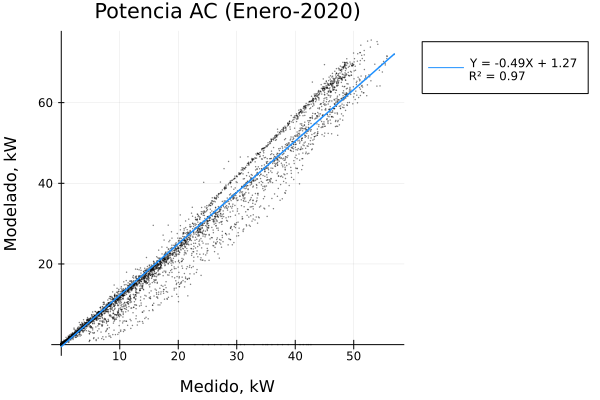

In [10]:
#=
Gráfica de correlación
=#

using Plots

a = round(coef(ols)[1], digits=2)
b = round(coef(ols)[2], digits=2)

Plots.plot(df_ols.X,
           df_ols.Y,
           seriestype = :scatter, 
           title="Potencia AC (Enero-2020)", 
           xlabel="Medido, kW", 
           ylabel="Modelado, kW",
           label="",
           legend=:outertopright,
           m=:circle,
           ms=1,
           mc=:black,
           alpha=0.5,
           dpi=500,
           frame=:origin)

Plots.plot!(df_ols."X", predict(ols), color=:dodgerblue, linewidth=1.5, label="Y = $(a)X + $(b)\nR² = $(R²)")

## Ejercicio 2: Comportamiento Estadístico Mensual

En la carpeta $\texttt{data}$ se dispone el archivo `SD_5Min.xlsx` que contiene las **mediciones** de los valores de producción de la planta solar fotovoltaica ubicada en el edificio Santo Domingo de la Universidad de los Andes, desde 1-Agosto-2019 hasta 30-Junio-2021.

<div class="alert alert-block alert-warning">
    
Escriba un algoritmo que permita obtener los valores máximo, promedio y mínimo para todos los días de un mes durante cada instante de tiempo. Es decir:

<img src='./img/table_excercise2.png' width='650'/>

Note que:
- La primera columna contiene las estampas de tiempo para un día completo, es decir, un dato cinco minutal desde las 00:00 hasta las 23:55.
- Se tiene una columna de datos de irradiancia por día; es decir, 30 o 31 columnas de datos.
- Se agregan las columnas de interés: mínimo, promedio y máximo. Estas son columnas calculadas con las 30 o 31 columnas de datos. Por ejemplo:
    - Columna: Mínimo, Fila: 11:55 -> min(800, 700, 880, ..., 630) = 630
    - Columna: Promedio, Fila: 12:00 -> mean(850, 680, 930, ..., 720) = 795
    - Columna: Máximo, Fila: 12:05 -> max(1010, 810, 850, ..., 760) = 1010
- La gráfica se genera al graficar en una misma figura: (i.) Tiempo vs Mín, (ii.) Tiempo vs Prom, (iii.) Tiempo vs. Max.
</div>

___

**Ejemplo** <br>
<font color="#FF5733">Output</font>
<img src='./img/irradiance_per_minute.png' width='750'/>

**Nota:** Solo se solicita la gráfica de los datos mínimo, promedio y máximo, es decir, los marcadores color azul, verde y naranja en esta figura.
___

In [11]:
#=
Se importan los datos de SD_5Min.xlsx
=#

using DataFrames
using XLSX

df = DataFrames.DataFrame(XLSX.readtable("./data/SD_5Min.xlsx", "Radiacion", header=true)...) # ./ es pwd()

df =  df[ (df[:, "Date"] .>= DateTime("2020-01-01T00:05:00")) .& 
          (df[:, "Date"] .<= DateTime("2020-02-01T00:05:00")), :]

first(df, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2020-01-01T00:05:00,0,1.018
2,2020-01-01T00:10:00,0,1.014
3,2020-01-01T00:15:00,0,1.008
4,2020-01-01T00:20:00,0,1
5,2020-01-01T00:25:00,0,0.996


In [12]:
#=
Se extraen las horas para cada dato
con el formato HH:MM
=#

horas = []

for i in df."Date"
    HH = Dates.hour(Dates.DateTime(i))
    MM = Dates.minute(Dates.DateTime(i))
    
    if MM < 10
        h = "$(HH):0$(MM)"
    else
        h = "$(HH):$(MM)"
    end
    push!(horas, h)
end


#horas = unique(horas)

df[:,"Horas"] = horas

first(df, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2),Horas
,Any,Any,Any,Any
1,2020-01-01T00:05:00,0,1.018,0:05
2,2020-01-01T00:10:00,0,1.014,0:10
3,2020-01-01T00:15:00,0,1.008,0:15
4,2020-01-01T00:20:00,0,1,0:20
5,2020-01-01T00:25:00,0,0.996,0:25


In [13]:
#=
Se realiza un query para cada hora (HH:MM)
y, con este conjunto, se extraen los valores
de mínimo, promedio y máximo con la función
'describe()'. Esta función retorna un DataFrame
y el estadístico de interés es '[3, estadístico]',
donde '3' es la tercera fila que corresponde al valor
de Meteocontrol Irrad.
=#

_min = []
_mean = []
_max = []

for i in unique(horas)
    _df = df[(df[:, "Horas"] .== i), :]
    
    push!(_min, describe(_df)[3, "min"])
    push!(_mean, describe(_df)[3, "mean"])
    push!(_max, describe(_df)[3, "max"])
end

df2 = DataFrame("Hora" => unique(horas),
                "Min" => _min,
                "Mean" => _mean,
                "Max" => _max)

first(df2, 5)

,Hora,Min,Mean,Max
,Any,Any,Any,Any
1,0:05,0.994,1.00663,1.028
2,0:10,0.99,1.0069,1.028
3,0:15,0.992,1.00581,1.028
4,0:20,0.986,1.00439,1.024
5,0:25,0.982,1.00219,1.028


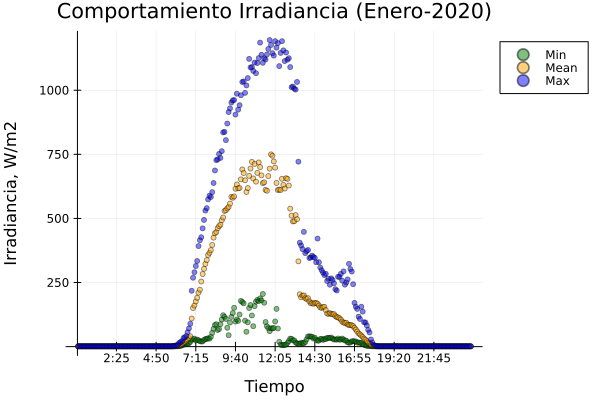

In [14]:
using Plots

Plots.plot(df2.Hora,
           [df2.Min, df2.Mean, df2.Max],
           seriestype = :scatter, 
           title="Comportamiento Irradiancia (Enero-2020)", 
           xlabel="Tiempo", 
           ylabel="Irradiancia, W/m2",
           label=["Min" "Mean" "Max"],
           legend=:outertopright,
           m=:circle,
           ms=3,
           mc=[:green :orange :blue],
           alpha=0.5,
           dpi=500,
           frame=:origin)

## Ejercicio 3: Histogramas y Distribuciones

En la carpeta $\texttt{data}$ se dispone el archivo `SD_5Min.xlsx` que contiene las **mediciones** de los valores de producción de la planta solar fotovoltaica ubicada en el edificio Santo Domingo de la Universidad de los Andes, desde 1-Agosto-2019 hasta 30-Junio-2021. 

<div class="alert alert-block alert-warning">
    
Similar al Ejercicio 2, escriba un algoritmo que permita obtener un DataFrame tal que:
- La primera columna contiene las estampas de tiempo para un día completo, es decir, un dato cinco minutal desde las 00:00 hasta las 23:55.
- Se tiene una columna de datos de irradiancia por día; es decir, 30 o 31 columnas de datos.

A partir de este DataFrame, cree un histogramas para tres instantes de tiempo diferentes (es decir, tres histogramas en total) y analice e interprete el resultado.

**Nota:** Explore qué es un *QQ-Plot* y cómo implementarlo en Julia.

</div>

___
**Ejemplo** <br>
<font color="#FF5733">Output</font>

<img src='./img/histograms.png' width='700'/>
___

In [15]:
#=
Se importan los datos de SD_5Min.xlsx
=#

using DataFrames
using XLSX

df = DataFrames.DataFrame(XLSX.readtable("./data/SD_5Min.xlsx", "Radiacion", header=true)...) # ./ es pwd()

df =  df[ (df[:, "Date"] .>= DateTime("2020-01-01T00:05:00")) .& 
          (df[:, "Date"] .<= DateTime("2020-02-01T00:05:00")), :]

for i in names(df)
    df[:,i] = replace(df[:,i], missing => 0)
end

first(df, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2)
,Any,Any,Any
1,2020-01-01T00:05:00,0,1.018
2,2020-01-01T00:10:00,0,1.014
3,2020-01-01T00:15:00,0,1.008
4,2020-01-01T00:20:00,0,1
5,2020-01-01T00:25:00,0,0.996


In [16]:
#=
Se extraen las horas para cada dato
con el formato HH:MM
=#

horas = []

for i in df."Date"
    HH = Dates.hour(Dates.DateTime(i))
    MM = Dates.minute(Dates.DateTime(i))
    
    if MM < 10
        h = "$(HH):0$(MM)"
    else
        h = "$(HH):$(MM)"
    end
    push!(horas, h)
end


#horas = unique(horas)

df[:,"Horas"] = horas

first(df, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2),Horas
,Any,Any,Any,Any
1,2020-01-01T00:05:00,0,1.018,0:05
2,2020-01-01T00:10:00,0,1.014,0:10
3,2020-01-01T00:15:00,0,1.008,0:15
4,2020-01-01T00:20:00,0,1,0:20
5,2020-01-01T00:25:00,0,0.996,0:25


In [17]:
#=
Se selecciona la hora de interés
con el formato HH:MM
=#

hora = "14:50"
df2 = df[(df[:, "Horas"] .== hora), :]
first(df2, 5)

,Date,Lufft Irrad (W/m2),Meteocontrol Irrad (W/m2),Horas
,Any,Any,Any,Any
1,2020-01-01T14:50:00,115.638,56.036,14:50
2,2020-01-02T14:50:00,146.594,100.72,14:50
3,2020-01-03T14:50:00,573.05,192.738,14:50
4,2020-01-04T14:50:00,695.522,229.788,14:50
5,2020-01-05T14:50:00,93.862,68.748,14:50


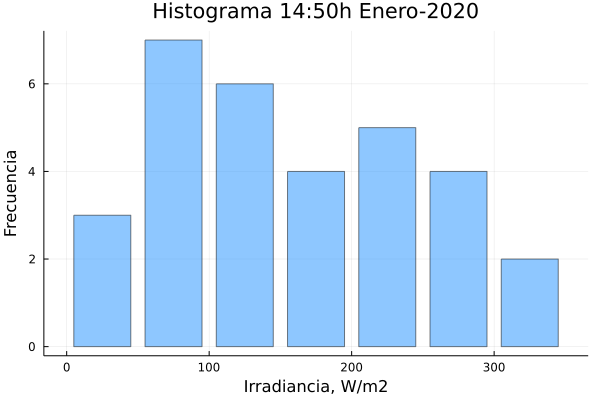

In [18]:
#=
Se grafica el histograma
=#

# Estimamos el número de bins con la Regla de Sturge
K = Int(round(1 + 3.322 * log(length(df2."Meteocontrol Irrad (W/m2)"))))

# Histograma
using StatsBase

h = fit(Histogram, Float64.(df2."Meteocontrol Irrad (W/m2)"), nbins=K)

hist = Plots.bar(h.edges,
                 h.weights,
                 xlabel="Irradiancia, W/m2",
                 ylabel="Frecuencia",
                 title="Histograma $(hora)h Enero-2020",
                 legend=false,
                 color=:dodgerblue,
                 alpha=0.5)